In [65]:
def outlierCleaners(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    import pandas as pd 
    df_ages = pd.DataFrame(ages, columns=["ages"])
    df_net  = pd.DataFrame(net_worths, columns=["net_worths"]).astype('float')
    df_pred = pd.DataFrame(predictions, columns=["predictions"]).astype('float')
    df_error = pd.DataFrame((df_pred["predictions"] - df_net["net_worths"]), columns=["errors"])
    df = pd.concat((df_ages, df_net, df_error), axis=1)
    
    return df


[[ 5.07793064]]
[ 25.21002155]
0.878262470366


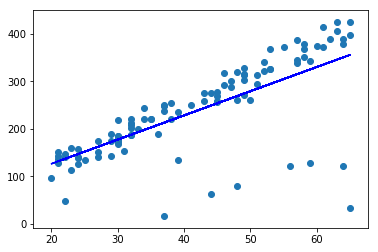

outlierCleaner() is returning an empty list, no refitting to be done


In [66]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner

### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
print reg.coef_
print reg.intercept_
print reg.score(ages_test, net_worths_test)

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()

else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"


In [67]:
df = outlierCleaners( predictions, ages_train, net_worths_train )
df.head()

,ages,net_worths,errors
0,57,338.089518,-23.437450
1,57,344.215868,-29.563800
2,34,243.792873,-45.933210
3,64,378.845781,-28.648199
4,25,133.883850,18.274438
